In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("xboxsales.csv")
print(data.head())



   Rank                      Name  Platform  Year    Genre  \
0     1                Saints Row  Xbox One  2022   Action   
1     2                     GTA 5  Xbox One  2013   Action   
2     3           Forza Horizon 5  Xbox One  2021   Racing   
3     4  Call of Duty Black Ops 4  Xbox One  2018  Shooter   
4     5  Call of Duty Black Ops 3  Xbox One  2015  Shooter   

              Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0           Deep Silver     15.00      5.00      0.24         2.00   
1  Take-Two Interactive      7.01      9.27      0.97         4.14   
2     Xbox Game Studios      9.43      0.40      0.41        10.57   
3            Activision      9.67      3.73      0.11         1.13   
4            Activision      5.77      5.81      0.35         2.31   

   Global_Sales  
0         22.00  
1         21.40  
2         20.81  
3         14.64  
4         14.24  


In [2]:
print(data.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [3]:
data = data.dropna()

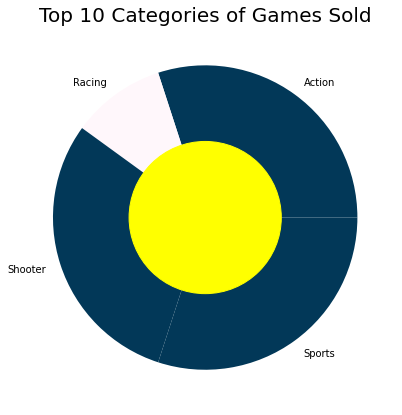

In [4]:
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='yellow')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.074158 -0.599321 -0.458979 -0.552030    -0.503445   
Year          0.074158  1.000000  0.287958 -0.470853 -0.366986     0.038023   
NA_Sales     -0.599321  0.287958  1.000000 -0.134779 -0.218375     0.133000   
EU_Sales     -0.458979 -0.470853 -0.134779  1.000000  0.746336    -0.183831   
JP_Sales     -0.552030 -0.366986 -0.218375  0.746336  1.000000     0.443977   
Other_Sales  -0.503445  0.038023  0.133000 -0.183831  0.443977     1.000000   
Global_Sales -0.953554 -0.082293  0.590723  0.381867  0.612074     0.644048   

              Global_Sales  
Rank             -0.953554  
Year             -0.082293  
NA_Sales          0.590723  
EU_Sales          0.381867  
JP_Sales          0.612074  
Other_Sales       0.644048  
Global_Sales      1.000000  


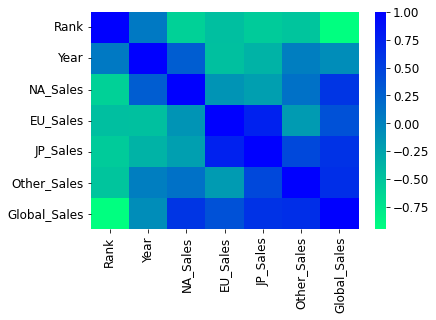

In [5]:
print(data.corr())
sns.heatmap(data.corr(), cmap="winter_r")
plt.show()

In [6]:
x = data[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)